Reference : https://machinelearningmastery.com/calculate-feature-importance-with-python/

https://www.javatpoint.com/feature-selection-techniques-in-machine-learning

# Import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot

# loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')

In [3]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0684  0.0024  0.0024  0.0024  0.0024  0.0098  0.0024  0.0488   
1       0.0586  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0415   
2       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0391   
3       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0342   
4       0.0488  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366   
...        ...     ...     ...     ...     ...     ...     ...     ...   
471478  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0562   
471479  0.0024  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0513   
471480  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0513   
471481  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0488   
471482  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0439   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0342           0    

In [4]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)
print(raw_data)

          Emg1    Emg2    Emg3    Emg4    Emg5    Emg6    Emg7    Emg8  \
0       0.0684  0.0024  0.0024  0.0024  0.0024  0.0098  0.0024  0.0488   
1       0.0586  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0415   
2       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0391   
3       0.0562  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0342   
4       0.0488  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0366   
...        ...     ...     ...     ...     ...     ...     ...     ...   
471478  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0562   
471479  0.0024  0.0024  0.0024  0.0024  0.0024  0.0049  0.0024  0.0513   
471480  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0513   
471481  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0488   
471482  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0024  0.0439   

          Emg9   Emg10  repetition  rerepetition  stimulus  restimulus  
0       0.0024  0.0342           0    

In [5]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000,378535.000000
mean,0.153991,0.151130,0.150774,0.053733,0.015006,0.017358,0.260184,0.265908,0.123911,0.079961,2.598087,2.598087,4.777310,4.777310
std,0.313319,0.353818,0.369052,0.184839,0.035486,0.046335,0.519964,0.384472,0.243624,0.166058,3.381989,3.381989,6.598915,6.598915
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.014600,0.068400,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.026900,0.002400,0.002400,0.002400,0.002400,0.002400,0.061000,0.124500,0.048800,0.041500,0.000000,0.000000,0.000000,0.000000
75%,0.151400,0.129400,0.109900,0.026900,0.004900,0.004900,0.256300,0.305200,0.148900,0.070800,5.000000,5.000000,9.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.231000,10.000000,10.000000,23.000000,23.000000


In [6]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [7]:
# Normalize feature vector
X2 = StandardScaler().fit_transform(X)

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.30, random_state = 0)

In [9]:
# instantiate the classifier with n_estimators = 100
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [10]:
# fit the classifier to the training set
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [11]:
# predict on the test set
y_pred = clf.predict(X_test)

<AxesSubplot:>

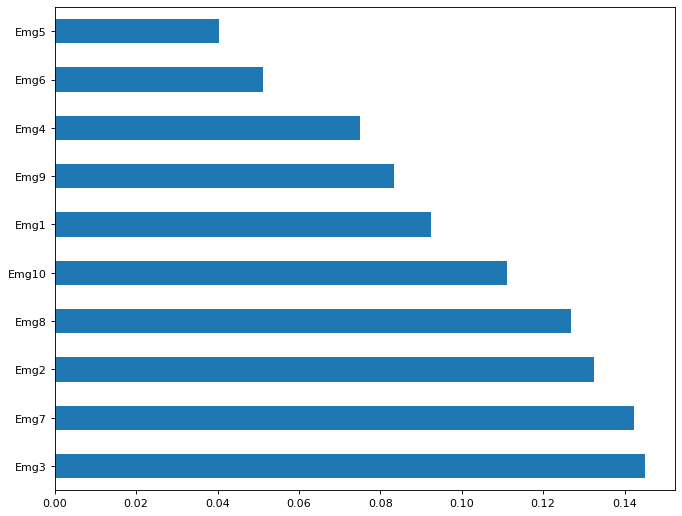

In [12]:
# visualize feature importance

plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='w', edgecolor='k')

feat_importances = pd.Series(clf.feature_importances_, index= X.columns)

feat_importances.nlargest(10).plot(kind='barh')